# Cyberbullying Classification

The data used to create a data set is a textual conversation taken from the Kaggle which provides 1,600 conversations in Formspring.me.

In [1]:
import pandas as pd
## Read excel file via Panda
df = pd.read_excel("dataset.xlsx")

# define shared column name as variables
severity1_column = "severity1 LOW"
severity2_column = "severity2 Middle"
severity3_column = "severity3 hight"

## CAST COLUMN TO INTEGER!
df[severity1_column] = pd.to_numeric(df[severity1_column], errors='coerce')
df[severity2_column] = pd.to_numeric(df[severity2_column], errors='coerce')
df[severity3_column] = pd.to_numeric(df[severity3_column], errors='coerce')

print(f"No of Rows - Original : {df.shape[0]}")
print(df)

No of Rows - Original : 12306
                userid  ... bully3
0      aguitarplayer94  ...    NaN
1          aprilpooh15  ...    NaN
2          aprilpooh15  ...    NaN
3          aprilpooh15  ...    NaN
4          aprilpooh15  ...    NaN
...                ...  ...    ...
12301       outlaw9000  ...    NaN
12302       outlaw9000  ...    NaN
12303       outlaw9000  ...    NaN
12304       outlaw9000  ...    NaN
12305         xoaall13  ...   None

[12306 rows x 14 columns]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data Cleansing**

Filter out some records with the following criteria:
- total characters < 15 letters
- having meaningless words like "haha", "hehe", "wkwk", "emm", "umm"

In [3]:
post_column = "post"
question_column = "ques"

post_more_than_15_letters = (df[post_column].str.len() >= 15)
question_more_than_15_letters = (df[question_column].str.len() >= 15)

meaningless_words = "haha|hehe|wkwk|emm|umm"
post_not_have_meaningless_words = (~df[post_column].str.contains(meaningless_words))
question_not_have_meaningless_words = (~df[question_column].str.contains(meaningless_words))

cleansed_df = df.loc[post_more_than_15_letters & question_more_than_15_letters & post_not_have_meaningless_words]
print(f"No of Rows - Cleansed : {cleansed_df.shape[0]}")


No of Rows - Cleansed : 9507


#**Data Balancing**

Balance the dataset into several categories:
- **2 Classes (Cyberbully, Non-Cyberbully)**
With Total Data : 1600
- 800 data with label "No"severity 0
- 800 data with label "Yes"severity 1-10


In [4]:
no_of_2_class_samples = 800

# defines filtering rules into 2 group!
ans1_positives = (df["ans1"] == "Yes")
ans1_negatives = (~ans1_positives)

_2class_positives = cleansed_df.loc[ans1_positives].sample(n=no_of_2_class_samples, replace=True)
_2class_negatives = cleansed_df.loc[ans1_negatives].sample(n=no_of_2_class_samples)

print(_2class_positives)
print(_2class_negatives)


            userid  ...                                             bully3
4351    lauraaatxd  ...                                                NaN
11585   outlaw9000  ...                                                NaN
9702   lalabitches  ...                                                NaN
4395    lauraaatxd  ...                                                NaN
11580   outlaw9000  ...                                                NaN
...            ...  ...                                                ...
7685      avlarios  ...                                                NaN
6412       zooshay  ...                                                NaN
4366    lauraaatxd  ...                                are you a virgin???
10509   outlaw9000  ...                                                NaN
3885       bksully  ...  : why are you such a bitch/whore cunt?r i hate...

[800 rows x 14 columns]
           userid  ... bully3
8438  kellyblake1  ...    NaN
923     teaachg

In [5]:
data = pd.concat([_2class_positives, _2class_negatives])

#**Tokenization**



In [6]:
import nltk
nltk.download('punkt')

output_tokenized_post_column = "tokenized_post"

def tokenization(text):
  return nltk.word_tokenize(text)

data[output_tokenized_post_column] = data[post_column].apply(tokenization)


print(data)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
            userid  ...                                     tokenized_post
4351    lauraaatxd  ...  [Q, :, (, ., ), (, ., ), boobies, are, my, pas...
11585   outlaw9000  ...  [Q, :, Real, outlaw, ?, Nice, (, :, Bad, to, t...
9702   lalabitches  ...  [Q, :, peyton, (, ugly, wite, skranyy, hoeish,...
4395    lauraaatxd  ...  [Q, :, Did, you, hangout, with, moises, today,...
11580   outlaw9000  ...  [Q, :, r, u, a, boy, or, girl, ?, <, br, >, A,...
...            ...  ...                                                ...
3463      xxrachxx  ...  [Q, :, What, are, you, getting, for, Xmas, :, ...
5031       zooshay  ...  [Q, :, Do, you, believe, that, he, or, she, wi...
2215     teaachgee  ...  [Q, :, Where, did, you, learn, how, to, drive,...
2350     teaachgee  ...  [Q, :, Would, you, ever, want, to, swim, with,...
2429   dearalexiis  ...            [Q, :, 809, 9501, <, --, --, Alexi

# Transform Case

In [7]:
output_lowered_tokenized_post_column = "lowered_tokenized_post"


def transform_lower_case(column):
  lower_cased = []
  for text in column:
    lower_cased.append(text.lower())
  return lower_cased

data[output_lowered_tokenized_post_column] = data[output_tokenized_post_column].apply(transform_lower_case)

print(data)

            userid  ...                             lowered_tokenized_post
4351    lauraaatxd  ...  [q, :, (, ., ), (, ., ), boobies, are, my, pas...
11585   outlaw9000  ...  [q, :, real, outlaw, ?, nice, (, :, bad, to, t...
9702   lalabitches  ...  [q, :, peyton, (, ugly, wite, skranyy, hoeish,...
4395    lauraaatxd  ...  [q, :, did, you, hangout, with, moises, today,...
11580   outlaw9000  ...  [q, :, r, u, a, boy, or, girl, ?, <, br, >, a,...
...            ...  ...                                                ...
3463      xxrachxx  ...  [q, :, what, are, you, getting, for, xmas, :, ...
5031       zooshay  ...  [q, :, do, you, believe, that, he, or, she, wi...
2215     teaachgee  ...  [q, :, where, did, you, learn, how, to, drive,...
2350     teaachgee  ...  [q, :, would, you, ever, want, to, swim, with,...
2429   dearalexiis  ...            [q, :, 809, 9501, <, --, --, alexis, &]

[1600 rows x 16 columns]


# Stop Words Removal

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = stopwords.words("english")

output_stop_words_post_column = "stop_words_lower_tokenized_post"
output_stop_words_question_column= "stop_words_lower_tokenized_ques"

def stop_words_removal(column):
  result = []
  ## add more if necessary!
  custom_stop_words = ["?"]
  for text in column:
    if text not in stopword + custom_stop_words:
      result.append(text)
  return result

data[output_stop_words_post_column] = data[output_lowered_tokenized_post_column].apply(stop_words_removal)

print(data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
            userid  ...                    stop_words_lower_tokenized_post
4351    lauraaatxd  ...  [q, :, (, ., ), (, ., ), boobies, passion, !, ...
11585   outlaw9000  ...  [q, :, real, outlaw, nice, (, :, bad, bone, <,...
9702   lalabitches  ...  [q, :, peyton, (, ugly, wite, skranyy, hoeish,...
4395    lauraaatxd  ...  [q, :, hangout, moises, today, saw, status, sa...
11580   outlaw9000  ...          [q, :, r, u, boy, girl, <, br, >, :, man]
...            ...  ...                                                ...
3463      xxrachxx  ...  [q, :, getting, xmas, :, <, br, >, :, got, ipo...
5031       zooshay  ...  [q, :, believe, always, special, place, heart,...
2215     teaachgee  ...  [q, :, learn, drive, learned, freeway, lol, pa...
2350     teaachgee  ...  [q, :, would, ever, want, swim, sharks, <, br,...
2429   dearalexiis  ...            [q, :, 809, 9501, <, --, --, 

# Filter Token

In [9]:
output_filtered_post_column = "filtered_tokenized_post"

def filter_token(column):
  result = []
  for text in column:
    if len(text) >= 3 and len(text) <= 25:
      result.append(text)
  return result

data[output_filtered_post_column] = data[output_stop_words_post_column].apply(filter_token)

print(data)

            userid  ...                            filtered_tokenized_post
4351    lauraaatxd  ...                      [boobies, passion, ..., cool]
11585   outlaw9000  ...  [real, outlaw, nice, bad, bone, dec, got, jail...
9702   lalabitches  ...  [peyton, ugly, wite, skranyy, hoeish, stank, w...
4395    lauraaatxd  ...  [hangout, moises, today, saw, status, said, na...
11580   outlaw9000  ...                                   [boy, girl, man]
...            ...  ...                                                ...
3463      xxrachxx  ...  [getting, xmas, got, ipod, ipod, dock, clothes...
5031       zooshay  ...  [believe, always, special, place, heart, dont,...
2215     teaachgee  ...  [learn, drive, learned, freeway, lol, paranoid...
2350     teaachgee  ...  [would, ever, want, swim, sharks, course, sure...
2429   dearalexiis  ...                                [809, 9501, alexis]

[1600 rows x 18 columns]


# Stemming

In [10]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
#is based on The Porter Stemming Algorithm

output_stemmed_post_column = "stemmed_post"


def stemming_token(column):
  result = []
  for text in column:
    result.append(wordnet_lemmatizer.lemmatize(text))
  return result

data[output_stemmed_post_column] = data[output_filtered_post_column].apply(stemming_token)

print(data)



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
            userid  ...                                       stemmed_post
4351    lauraaatxd  ...                        [booby, passion, ..., cool]
11585   outlaw9000  ...  [real, outlaw, nice, bad, bone, dec, got, jail...
9702   lalabitches  ...  [peyton, ugly, wite, skranyy, hoeish, stank, w...
4395    lauraaatxd  ...  [hangout, moises, today, saw, status, said, na...
11580   outlaw9000  ...                                   [boy, girl, man]
...            ...  ...                                                ...
3463      xxrachxx  ...  [getting, xmas, got, ipod, ipod, dock, clothes...
5031       zooshay  ...  [believe, always, special, place, heart, dont,...
2215     teaachgee  ...  [learn, drive, learned, freeway, lol, paranoid...
2350     teaachgee  ...  [would, ever, want, swim, shark, course, sure,...
2429   dearalexiis  ...                                [809, 9501, a

In [11]:
data.to_csv('dataclean.csv')

#Fast Text

In [12]:
import os
import pandas as pd
from tqdm.auto import tqdm
from nltk.tokenize import word_tokenize
from gensim.models import FastText

#Prepare Corpus

In [13]:
df = pd.read_csv("dataclean.csv") 
df.head()

,Unnamed: 0,userid,post,ques,ans,asker,ans1,severity1 LOW,bully1,ans2,severity2 Middle,bully2,ans3,severity3 hight,bully3,tokenized_post,lowered_tokenized_post,stop_words_lower_tokenized_post,filtered_tokenized_post,stemmed_post
0,4351,lauraaatxd,Q: (.) (.) boobies are my passion!<br>A: ... c...,(.) (.) boobies are my passion!,... cool?,None,Yes,6.0,(.) (.) boobies are my passion!,No,0.0,NaN,No,0.0,NaN,"['Q', ':', '(', '.', ')', '(', '.', ')', 'boob...","['q', ':', '(', '.', ')', '(', '.', ')', 'boob...","['q', ':', '(', '.', ')', '(', '.', ')', 'boob...","['boobies', 'passion', '...', 'cool']","['booby', 'passion', '...', 'cool']"
1,11585,outlaw9000,Q: Real outlaw? Nice(: Bad to the bone?<br>A: ...,Real outlaw? Nice(: Bad to the bone?,very In Dec I got out of jail after a 6 month ...,None,Yes,3.0,I am still on probation for that shit.,No,0.0,NaN,No,0.0,NaN,"['Q', ':', 'Real', 'outlaw', '?', 'Nice', '(',...","['q', ':', 'real', 'outlaw', '?', 'nice', '(',...","['q', ':', 'real', 'outlaw', 'nice', '(', ':',...","['real', 'outlaw', 'nice', 'bad', 'bone', 'dec...","['real', 'outlaw', 'nice', 'bad', 'bone', 'dec..."
2,9702,lalabitches,Q: peyton (ugly wite skranyy hoeish stank wa...,peyton (ugly wite skranyy hoeish stank wanna...,yup i think i rote this myself lol ahaaa;] and...,None,Yes,8.0,peyton (ugly wite skranyy hoeish stank wannabe...,No,0.0,NaN,No,0.0,NaN,"['Q', ':', 'peyton', '(', 'ugly', 'wite', 'skr...","['q', ':', 'peyton', '(', 'ugly', 'wite', 'skr...","['q', ':', 'peyton', '(', 'ugly', 'wite', 'skr...","['peyton', 'ugly', 'wite', 'skranyy', 'hoeish'...","['peyton', 'ugly', 'wite', 'skranyy', 'hoeish'..."
3,4395,lauraaatxd,Q: Did you hangout with moises today because ...,Did you hangout with moises today because i s...,yes i did and dont worry about it:),None,Yes,4.0,Did you hangout with moises today because i sa...,Yes,4.0,your in 7th grade for crying out loud???,No,0.0,NaN,"['Q', ':', 'Did', 'you', 'hangout', 'with', 'm...","['q', ':', 'did', 'you', 'hangout', 'with', 'm...","['q', ':', 'hangout', 'moises', 'today', 'saw'...","['hangout', 'moises', 'today', 'saw', 'status'...","['hangout', 'moises', 'today', 'saw', 'status'..."
4,11580,outlaw9000,Q: r u a boy or girl?<br>A: Man,r u a boy or girl?,Man,None,Yes,4.0,are u a boy or girl,No,0.0,NaN,No,0.0,NaN,"['Q', ':', 'r', 'u', 'a', 'boy', 'or', 'girl',...","['q', ':', 'r', 'u', 'a', 'boy', 'or', 'girl',...","['q', ':', 'r', 'u', 'boy', 'girl', '<', 'br',...","['boy', 'girl', 'man']","['boy', 'girl', 'man']"


In [14]:
sentences = [word_tokenize(review.lower()) for review in tqdm(df.post)]
sentences[:6]

[['q',
  ':',
  '(',
  '.',
  ')',
  '(',
  '.',
  ')',
  'boobies',
  'are',
  'my',
  'passion',
  '!',
  '<',
  'br',
  '>',
  'a',
  ':',
  '...',
  'cool',
  '?'],
 ['q',
  ':',
  'real',
  'outlaw',
  '?',
  'nice',
  '(',
  ':',
  'bad',
  'to',
  'the',
  'bone',
  '?',
  '<',
  'br',
  '>',
  'a',
  ':',
  'very',
  'in',
  'dec',
  'i',
  'got',
  'out',
  'of',
  'jail',
  'after',
  'a',
  '6',
  'month',
  'sentence',
  '.',
  'i',
  'am',
  'still',
  'on',
  'probation',
  'for',
  'that',
  'shit',
  '.',
  'lol'],
 ['q',
  ':',
  'peyton',
  '(',
  'ugly',
  'wite',
  'skranyy',
  'hoeish',
  'stank',
  'wannabe',
  'kassie',
  ')',
  'is',
  'fake',
  'azz',
  'hell.',
  '<',
  'br',
  '>',
  'a',
  ':',
  'yup',
  'i',
  'think',
  'i',
  'rote',
  'this',
  'myself',
  'lol',
  'ahaaa',
  ';',
  ']',
  'and',
  'yess',
  'ppl',
  'she',
  'is',
  '.'],
 ['q',
  ':',
  'did',
  'you',
  'hangout',
  'with',
  'moises',
  'today',
  'because',
  'i',
  'saw',
  'his',

#TRAINING MODEL FAST TEXT

In [15]:
model= FastText(sentences, size=128, window=5, min_count=1, workers=4, iter=1000, sg=0, hs=0)

In [16]:
os.makedirs("model/fasttext/", exist_ok=True)

#Save

In [17]:
model.save("model/fasttext/cyberbullying.fasttext")

#Load

In [18]:
model = FastText.load("model/fasttext/cyberbullying.fasttext")

In [19]:
w2v = model.wv 

In [20]:
w2v.index2word

[':',
 'a',
 '?',
 '<',
 'q',
 'you',
 '>',
 'br',
 'i',
 '!',
 '.',
 'to',
 'the',
 'and',
 'do',
 'your',
 'it',
 ')',
 'is',
 ';',
 'what',
 'in',
 'that',
 'are',
 'my',
 'have',
 'of',
 '&',
 'me',
 'lol',
 'u',
 'not',
 'if',
 'like',
 'would',
 'on',
 'so',
 'but',
 'for',
 '...',
 'with',
 'be',
 'or',
 '(',
 'know',
 'why',
 'think',
 'no',
 'how',
 'was',
 'im',
 "n't",
 'just',
 'who',
 'love',
 'd',
 'all',
 'when',
 'can',
 'fake',
 'one',
 'get',
 'as',
 'want',
 'r',
 'dont',
 'ever',
 'about',
 '..',
 'really',
 'yes',
 'apos',
 '@',
 'at',
 'they',
 'this',
 'up',
 'did',
 'its',
 'she',
 'people',
 'out',
 'had',
 'quot',
 'lmao',
 'too',
 'ur',
 'am',
 'we',
 'time',
 'go',
 'does',
 '3',
 'were',
 'then',
 'will',
 'there',
 'say',
 "'s",
 'much',
 'thats',
 ']',
 'well',
 'them',
 'an',
 'life',
 'tell',
 'thing',
 'back',
 'got',
 'now',
 'going',
 'person',
 'last',
 'bitch',
 'from',
 'shit',
 'p',
 'where',
 'talk',
 'any',
 'been',
 'he',
 '$',
 'fuck',
 'some

In [21]:
w2v.vectors

array([[ 1.5881387 , -0.1615962 , -0.8816173 , ..., -0.48227856,
        -0.5749862 , -9.518753  ],
       [-8.4140835 , -0.52337706,  0.88618684, ..., -2.887018  ,
         2.4482782 , -5.317314  ],
       [-1.4739401 , -1.4790385 ,  1.9247633 , ..., -4.4185095 ,
        -2.4377174 , -1.8559012 ],
       ...,
       [-0.35876352, -0.17229517,  0.36908326, ...,  0.01327638,
         0.37465551,  0.63099045],
       [-0.325714  , -0.38007677,  0.20911683, ..., -0.05602186,
         0.30824083,  0.6257647 ],
       [ 0.40436548, -0.3543051 ,  0.31922755, ..., -0.7728941 ,
        -0.63835764, -1.2108864 ]], dtype=float32)

In [22]:
w2v.vector_size

128

#SENITY CHEK


In [23]:
w2v["trusting"]

array([ 1.0384952 , -1.9625375 ,  1.4167771 ,  1.9432824 ,  3.6613874 ,
        0.91782945,  0.01832323, -1.3543642 ,  0.79303145, -0.9585277 ,
        0.15348993,  0.42607304,  1.3265281 ,  0.23227037,  0.4650502 ,
        0.13418792, -0.91963315, -1.1169977 ,  1.977453  ,  1.4689105 ,
       -0.41671583, -1.302293  ,  1.1333556 ,  0.35733533,  0.27228406,
        0.93188107,  1.535644  , -0.20492771, -0.3532161 , -0.77674216,
       -1.3167953 , -0.37344328,  0.74917686,  0.36984876, -0.24958614,
        2.0211756 , -0.6584522 ,  0.92973554, -0.566313  ,  2.266237  ,
       -1.08826   , -1.0037966 ,  1.0714546 ,  3.2527797 , -1.9708307 ,
        0.54783195,  1.9632448 ,  0.92410547, -0.43630403, -1.5097709 ,
       -0.99628407, -0.666845  ,  1.59813   ,  0.08842039, -0.8625244 ,
        1.5348707 , -0.01107606, -2.0399663 , -2.056364  ,  0.54368234,
        0.39994946,  2.106021  ,  0.26546815, -1.0353776 ,  0.15228367,
       -0.2865232 ,  1.5388602 ,  1.3580668 , -0.7627727 , -0.73

# SIMILIAR WORD

In [24]:
w2v.similar_by_word("trusting", topn=5)

[('testing', 0.7656937837600708),
 ('anyting', 0.6312532424926758),
 ('tingling', 0.6311058402061462),
 ('wanting', 0.6040869951248169),
 ('dating', 0.5884765386581421)]

#Visualisasi

In [25]:
from umap import UMAP
import numpy as np
import pandas as pd
import plotly.express as px

In [26]:
X = UMAP().fit_transform(w2v.vectors)

In [27]:
df = pd.DataFrame(X, columns=["umap1", "umap2"])
df["text"] = w2v.index2word
print(df)

          umap1     umap2    text
0      8.788020 -6.522096       :
1      9.522700 -7.803945       a
2      9.517410 -7.761244       ?
3      9.239889 -7.636702       <
4     12.194777 -4.131774       q
...         ...       ...     ...
4285   8.857487 -5.653574    swim
4286   8.549914 -5.474135  sharks
4287  10.466953 -6.007862     809
4288  10.569194 -5.843219    9501
4289  10.922736 -5.861894  alexis

[4290 rows x 3 columns]


In [28]:
fig = px.scatter(df, x="umap1", y="umap2", text="text")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=900,
    title_text='Reduce FastText Visualization'
)
fig.show()

#SENTIMEN ANALISIS With Fast Text

In [29]:
%pip install jcopml

     |████████████████████████████████| 102kB 6.4MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.10-py2.py3-none-any.whl size=33230 sha256=7b186159c09e4eaded3988e0a96ab7fb92e756e21c2108d7ce725c4cc9742029
  Stored in directory: /root/.cache/pip/wheels/82/22/ce/b8b4c3400f788e5050b5b4b4d988884b8ec72b6b8751693914
Successfully built jcopml


In [30]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease



In [31]:
%pip install xgboost

In [32]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_english = stopwords.words ("english") + list(punctuation)

In [33]:
df = pd.read_csv("dataclean.csv")
df.head()

,Unnamed: 0,userid,post,ques,ans,asker,ans1,severity1 LOW,bully1,ans2,severity2 Middle,bully2,ans3,severity3 hight,bully3,tokenized_post,lowered_tokenized_post,stop_words_lower_tokenized_post,filtered_tokenized_post,stemmed_post
0,4351,lauraaatxd,Q: (.) (.) boobies are my passion!<br>A: ... c...,(.) (.) boobies are my passion!,... cool?,None,Yes,6.0,(.) (.) boobies are my passion!,No,0.0,NaN,No,0.0,NaN,"['Q', ':', '(', '.', ')', '(', '.', ')', 'boob...","['q', ':', '(', '.', ')', '(', '.', ')', 'boob...","['q', ':', '(', '.', ')', '(', '.', ')', 'boob...","['boobies', 'passion', '...', 'cool']","['booby', 'passion', '...', 'cool']"
1,11585,outlaw9000,Q: Real outlaw? Nice(: Bad to the bone?<br>A: ...,Real outlaw? Nice(: Bad to the bone?,very In Dec I got out of jail after a 6 month ...,None,Yes,3.0,I am still on probation for that shit.,No,0.0,NaN,No,0.0,NaN,"['Q', ':', 'Real', 'outlaw', '?', 'Nice', '(',...","['q', ':', 'real', 'outlaw', '?', 'nice', '(',...","['q', ':', 'real', 'outlaw', 'nice', '(', ':',...","['real', 'outlaw', 'nice', 'bad', 'bone', 'dec...","['real', 'outlaw', 'nice', 'bad', 'bone', 'dec..."
2,9702,lalabitches,Q: peyton (ugly wite skranyy hoeish stank wa...,peyton (ugly wite skranyy hoeish stank wanna...,yup i think i rote this myself lol ahaaa;] and...,None,Yes,8.0,peyton (ugly wite skranyy hoeish stank wannabe...,No,0.0,NaN,No,0.0,NaN,"['Q', ':', 'peyton', '(', 'ugly', 'wite', 'skr...","['q', ':', 'peyton', '(', 'ugly', 'wite', 'skr...","['q', ':', 'peyton', '(', 'ugly', 'wite', 'skr...","['peyton', 'ugly', 'wite', 'skranyy', 'hoeish'...","['peyton', 'ugly', 'wite', 'skranyy', 'hoeish'..."
3,4395,lauraaatxd,Q: Did you hangout with moises today because ...,Did you hangout with moises today because i s...,yes i did and dont worry about it:),None,Yes,4.0,Did you hangout with moises today because i sa...,Yes,4.0,your in 7th grade for crying out loud???,No,0.0,NaN,"['Q', ':', 'Did', 'you', 'hangout', 'with', 'm...","['q', ':', 'did', 'you', 'hangout', 'with', 'm...","['q', ':', 'hangout', 'moises', 'today', 'saw'...","['hangout', 'moises', 'today', 'saw', 'status'...","['hangout', 'moises', 'today', 'saw', 'status'..."
4,11580,outlaw9000,Q: r u a boy or girl?<br>A: Man,r u a boy or girl?,Man,None,Yes,4.0,are u a boy or girl,No,0.0,NaN,No,0.0,NaN,"['Q', ':', 'r', 'u', 'a', 'boy', 'or', 'girl',...","['q', ':', 'r', 'u', 'a', 'boy', 'or', 'girl',...","['q', ':', 'r', 'u', 'boy', 'girl', '<', 'br',...","['boy', 'girl', 'man']","['boy', 'girl', 'man']"


In [34]:
df.ans1.value_counts(normalize=True)

No     0.5
Yes    0.5
Name: ans1, dtype: float64

In [35]:
from gensim.models import FastText

In [36]:
w2v = FastText.load("model/fasttext/cyberbullying.fasttext").wv

In [37]:
def sent_vector(sentence, w2v_model, stopwords):
    vecs = [w2v_model[word.lower()] for word in word_tokenize(sentence) if word not in stopwords]
    sent_vec = np.mean(vecs, axis=0)
    return sent_vec

def norm_sent_vector(sentence, w2v_model, stopwords):
    vecs = [w2v_model[word.lower()] for word in word_tokenize(sentence) if word not in stopwords]
    norm_vecs = [vec / np.linalg.norm(vec) for vec in vecs if np.linalg.norm(vec) > 0]
    sent_vec = np.mean(norm_vecs, axis=0)
    return sent_vec
    

In [38]:
vecs = [norm_sent_vector(sentence, w2v, sw_english) for sentence in df.ans1]
vecs = np.array(vecs)
vecs

array([[-0.02403806, -0.01592385, -0.00841133, ..., -0.03197677,
        -0.06263378, -0.19695777],
       [-0.02403806, -0.01592385, -0.00841133, ..., -0.03197677,
        -0.06263378, -0.19695777],
       [-0.02403806, -0.01592385, -0.00841133, ..., -0.03197677,
        -0.06263378, -0.19695777],
       ...,
       [ 0.20343523,  0.01278446, -0.0228087 , ..., -0.04002877,
        -0.09330375,  0.00993961],
       [ 0.20343523,  0.01278446, -0.0228087 , ..., -0.04002877,
        -0.09330375,  0.00993961],
       [ 0.20343523,  0.01278446, -0.0228087 , ..., -0.04002877,
        -0.09330375,  0.00993961]], dtype=float32)

In [39]:
vecs.shape

(1600, 128)

In [40]:
X = vecs
y = df.ans1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1280, 128), (320, 128), (1280,), (320,))

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

from sklearn.feature_extraction.text import CountVectorizer

In [42]:
pipeline = Pipeline([
    ('algo', SVC(max_iter=500))
])

model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=4, n_iter=50, n_jobs=-1, verbose=1, random_state=12)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    5.8s


{'algo__C': 0.008413506881469935, 'algo__gamma': 27.56120358523939}
1.0 1.0 1.0


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.0s finished


In [43]:
from jcopml.plot import plot_confusion_matrix

# Visualisasi Classification SVM

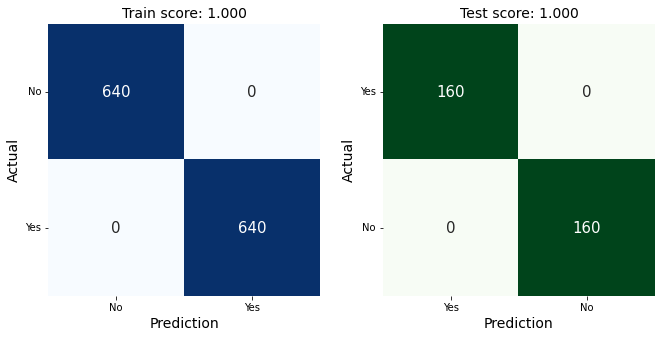

In [44]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [45]:
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = model.predict(X_test)

print('recall: {}'.format(recall_score(y_test, y_pred, average='weighted')))
print('precission: {}'.format(precision_score(y_test, y_pred, average='weighted')))
print('f1-score: {}'.format(f1_score(y_test, y_pred, average='weighted'))) 


recall: 1.0
precission: 1.0
f1-score: 1.0


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       160
         Yes       1.00      1.00      1.00       160

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [47]:
from sklearn.naive_bayes import GaussianNB

#Visualisasi Classification Naive Bayes

recall: 1.0
precission: 1.0
f1-score: 1.0


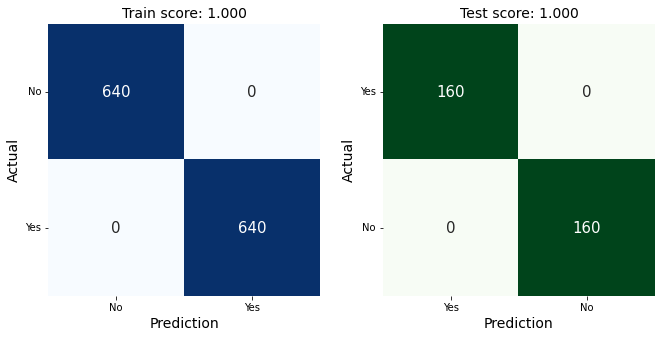

In [48]:
modelnb = GaussianNB()

nbtrain = modelnb.fit(X_train, y_train)

plot_confusion_matrix(X_train, y_train, X_test, y_test, modelnb)

from sklearn.metrics import f1_score, precision_score, recall_score
y_predNB = model.predict(X_test)

print('recall: {}'.format(recall_score(y_test, y_predNB, average='weighted')))
print('precission: {}'.format(precision_score(y_test, y_predNB, average='weighted')))
print('f1-score: {}'.format(f1_score(y_test, y_predNB, average='weighted'))) 

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       160
         Yes       1.00      1.00      1.00       160

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

